In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
def make_connection_with_db():
    import mysql.connector
  
    connection_mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        password="",
        database="market"
    )
    cursor = connection_mydb.cursor(dictionary=True)#dictionary=True result in dectionary
    return connection_mydb, cursor

In [26]:
def get_customer_by_country():
    _,curser=make_connection_with_db()

    query='''
    SELECT country, count(customer_id) as count_by_country 
          FROM  wp_wc_customer_lookup 
          group by country'''

    curser.execute(query)

    results=curser.fetchall()

    data=pd.DataFrame(columns=['country','count_by_country'])

    for customer in results:
        obj={
            'country':[customer['country']],
            'count_by_country':[customer['count_by_country']]
        }
        df=pd.DataFrame(obj)
        data=pd.concat([data,df],ignore_index=True)

    return data

In [29]:
customers_of_a_country=get_customer_by_country()
customers_of_a_country

,country,count_by_country
0,AE,209
1,BH,218
2,JO,187
3,KW,188
4,SA,179


In [33]:
def customers_of_a_country_bar():
    customers_of_a_country=get_customer_by_country()

    x=customers_of_a_country['country']
    y=customers_of_a_country['count_by_country']

    plt.xlabel('country')
    plt.ylabel('numbers')

    plt.title('Customers of each country')

    colors=[]
    for i in range(len(x)):
        colors.append([np.random.rand(),np.random.rand(),np.random.rand()])
        plt.text(x=i,y=y[i],s=y[i])
    plt.bar(x,y,color=colors)
    plt.show()

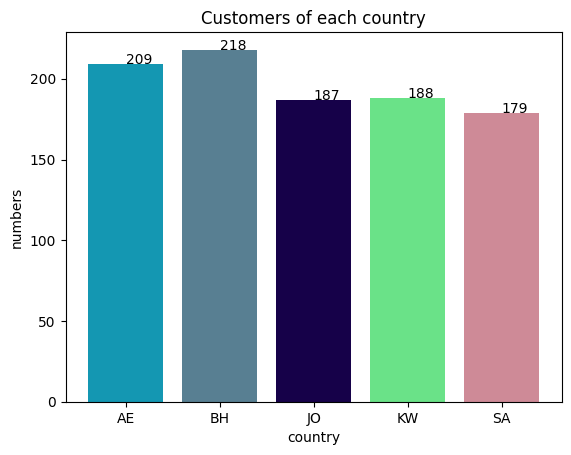

In [34]:
customers_of_a_country_bar()

In [39]:
def show_customer_counts_with_pie():
    customers_of_a_country=get_customer_by_country()
    plt.pie(customers_of_a_country['count_by_country'],labels=customers_of_a_country['country']
            ,autopct='%1.1f%%')
    plt.show()
    

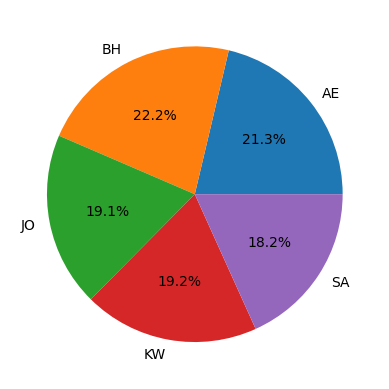

In [40]:
show_customer_counts_with_pie()